## Preperation

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import  pyplot as plt

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

# PyTorch Modules
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

from torchviz import make_dot, make_dot_from_trace
from tqdm.notebook import tqdm

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

TARGET='Exited'
RANDOM_STATE=42

In [10]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [11]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [13]:
train.drop(columns=['id','Surname','CustomerId'],inplace=True)
test.drop(columns=['id','Surname','CustomerId'],inplace=True)

In [14]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [18]:
cat_cols=[col for col in train.columns if train[col].dtype=='O']
cat_cols

['Geography', 'Gender']

In [19]:
LE=LabelEncoder()
for col in cat_cols:
    train[col]=LE.fit_transform(train[col])
    test[col]=LE.transform(test[col])

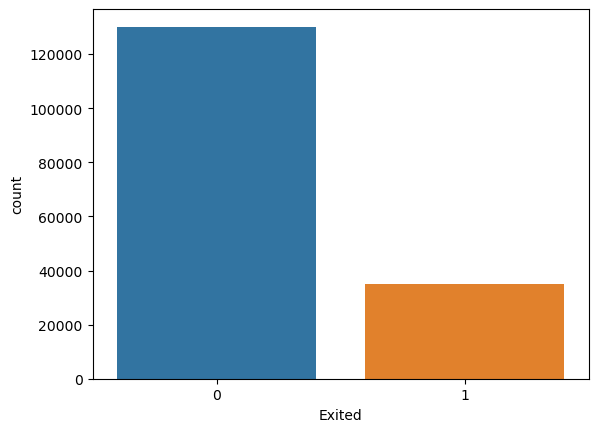

In [26]:
X=train.drop(columns=TARGET,axis=1)
y=train[TARGET]

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,
                                             stratify=y,
                                             random_state=RANDOM_STATE) # straify to maintain the ratio of classes in train and val set
sns.countplot(data=train,x=TARGET);

In [27]:
MMScaler=MinMaxScaler()
X_train=MMScaler.fit_transform(X_train)
X_val=MMScaler.transform(X_val)

In [30]:
# Dataset --> Numpy arrays
X_train,y_train=np.array(X_train,dtype=np.float32),np.array(y_train,dtype=np.float32)
X_val,y_val=np.array(X_val,dtype=np.float32),np.array(y_val,dtype=np.float32)